In [ ]:
%pip install pandas matplotlib

In [3]:
import pandas as pd
import matplotlib.pyplot as plt 

In [37]:
# ls -d -1 run-*-p-0.7
prob = 0.3
runs = [
    f'run-ticks-1-1-1--p-{prob}',
    # f'run-ticks-1-2-3--p-{prob}',
    f'run-ticks-1-3-6--p-{prob}',
    # f'run-ticks-3-4-5--p-{prob}',
    f'run-ticks-4-5-6--p-{prob}',
]

In [38]:
def last_three(run):
    A = pd.read_csv(f"./{run}/machine_A_log.csv")
    B = pd.read_csv(f"./{run}/machine_B_log.csv")
    C = pd.read_csv(f"./{run}/machine_C_log.csv")
    
    print(A.tail(1))
    print(B.tail(1))
    print(C.tail(1))
    print('---')

last_three('run-ticks-1-1-1--p-0.3')

last_three('run-ticks-1-3-6--p-0.3')

last_three('run-ticks-4-5-6--p-0.3')

          received   global time  len of queue  logical clock time
64  POP FROM QUEUE  1.678253e+09             0                  71
          received   global time  len of queue  logical clock time
64  POP FROM QUEUE  1.678253e+09             2                  69
     received   global time  len of queue  logical clock time
69  SEND TO B  1.678253e+09             0                  71
---
          received   global time  len of queue  logical clock time
59  POP FROM QUEUE  1.678252e+09           104                 154
           received   global time  len of queue  logical clock time
179  POP FROM QUEUE  1.678252e+09             8                 420
      received   global time  len of queue  logical clock time
438  SEND TO B  1.678252e+09             0                 438
---
           received   global time  len of queue  logical clock time
245  POP FROM QUEUE  1.678253e+09             3                 419
      received   global time  len of queue  logical clock time
341  

In [39]:
def view_plots(duration):
    for run in runs:
        # columns = ["received", "global time", "len of queue", "logical clock time"]
        A = pd.read_csv(f"./{run}/machine_A_log.csv")
        B = pd.read_csv(f"./{run}/machine_B_log.csv")
        C = pd.read_csv(f"./{run}/machine_C_log.csv")
        
        dfs = {"A": A, "B": B, "C": C}
        split = run.split('-')
        tick_rates = {"A": split[2], "B": split[3], "C": split[4]}
        p_internal = split[-1]

        print("______________________________________________________")
        print("Run Name: ", run)
        tick_rates = {"A": split[2], "B": split[3], "C": split[4]}
        print("______________________________________________________")
        
        plt.title(f"Plot time for run with tick rates {tick_rates} and p_internal {p_internal}")

        for name, df in dfs.items():
            start_time = df["global time"][0]
            df["global time"] = df["global time"] - start_time
            df = df[df["global time"] < duration]

            plt.plot(df["global time"], df["logical clock time"], label=f"{name} (tick rate = {tick_rates[name]})") 
            
        plt.xlabel("global time")
        plt.ylabel("logical clock time")
        plt.legend()
        plt.savefig(f"./{run}/logical_clock_plot_{duration}")
        plt.show()


        plt.title(f"Plot queue length for run with tick rates {tick_rates} and p_internal {p_internal}")

        for name, df in dfs.items():
            start_time = df["global time"][0]
            df["global time"] = df["global time"] - start_time
            df = df[df["global time"] < duration * 1000]

            plt.plot(df["global time"], df["len of queue"], label=f"{name}_queue (tick rate = {tick_rates[name]})") 
            

        plt.xlabel("global time")
        plt.ylabel("length of queue")
        plt.legend()
        plt.savefig(f"./{run}/q_plot_{duration}")
        plt.show()
    
    

______________________________________________________
Run Name:  run-ticks-1-1-1--p-0.3
______________________________________________________


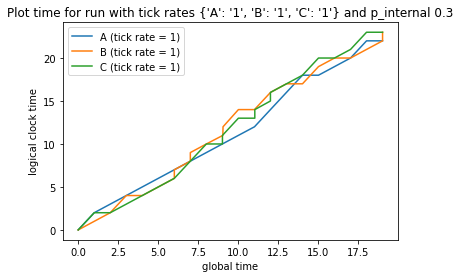

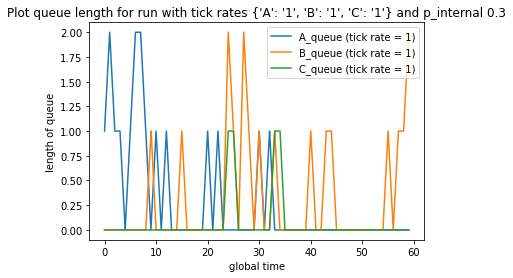

______________________________________________________
Run Name:  run-ticks-1-3-6--p-0.3
______________________________________________________


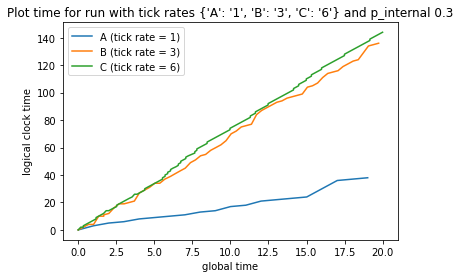

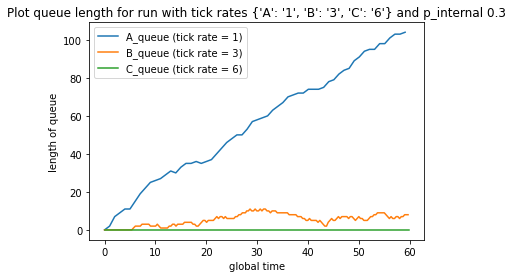

______________________________________________________
Run Name:  run-ticks-4-5-6--p-0.3
______________________________________________________


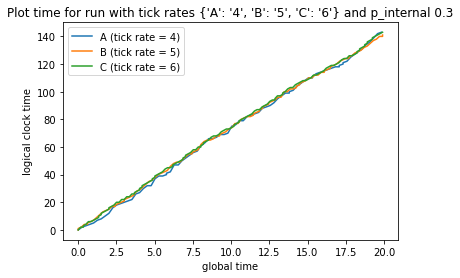

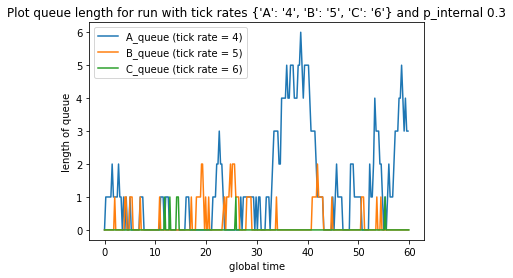

In [40]:
view_plots(20)

______________________________________________________
Run Name:  run-ticks-1-1-1--p-0.3
______________________________________________________


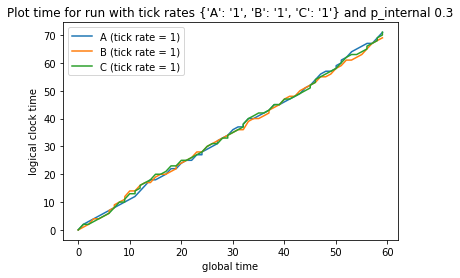

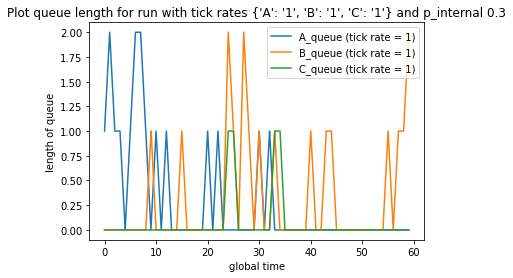

______________________________________________________
Run Name:  run-ticks-1-3-6--p-0.3
______________________________________________________


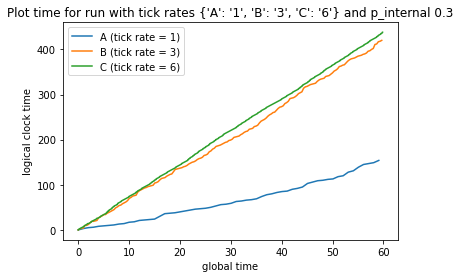

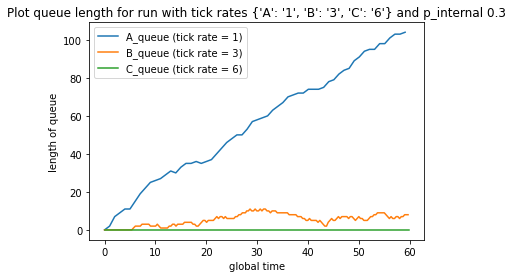

______________________________________________________
Run Name:  run-ticks-4-5-6--p-0.3
______________________________________________________


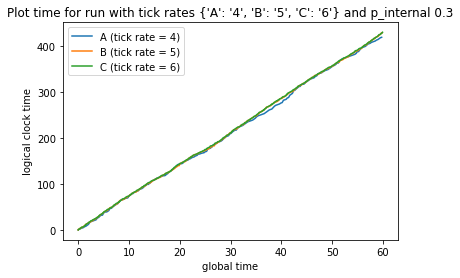

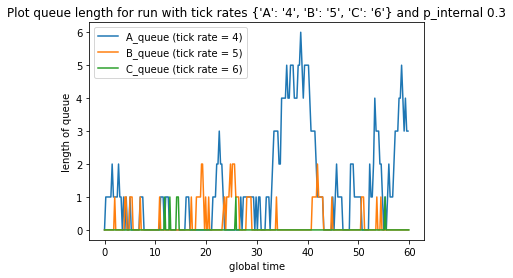

In [41]:
view_plots(60)